In [9]:
import pyTextMiner as ptm
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#본문 모두 합한거로 파일 만들기
df = pd.read_csv('naver_kakaomini_duplicate.csv',
                     names=['url', 'title', 'date', 'content'])
df.head()

,url,title,date,content
0,['https://blog.naver.com/pinky24?Redirect=Log&...,카카오미니C 개봉기 사용기 내가 느낀 장단점,2018-12-28 01:15:00,"['카카오미니C 개봉기 사용기 내가 느낀 장단점', '카카오미니C 라고? 생활이 편..."
1,['https://blog.naver.com/syokolla?Redirect=Log...,딜라이브플러스UHD 카카오미니 언제 어디서든 드라마 영화를 보자!,2019-02-25 17:57:00,"['딜라이브플러스UHD 카카오미니 언제 어디서든 드라마 영화를 보자!', '안녕하세..."
2,['https://blog.naver.com/chyung1505?Redirect=L...,딜라이브플러스UHD와 카카오미니로 넷플릭스 즐기기~,2018-12-11 19:13:00,"['스마트하게 살아보자 싶으면 항상 약정에 매여있을 수밖엔 없는... 시스템이', ..."
3,['http://cheonching.com/221439084555'],AI 스피커로 유용한 카카오 미니C,2019-01-11 07:00:00,"['AI 스피커로 유용한 카카오 미니C ', ' 블루투스 스피커에 AI 서비..."
4,['https://blog.naver.com/godlovedmsal?Redirect...,2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박,2019-02-25 22:00:00,"['2월 예스24굿즈 카카오프렌즈 미니크로스백 사은품 대박', '2월 예스24굿즈 ..."


In [11]:
df.shape

(90, 4)

In [12]:
df = df.dropna(subset=['content']) #다시 재정의 필요
df.shape
#dropna해도 왜 NaN 값 행들이 사라지지 않을까..?
#데이터 전처리 필요하지만 우선 pyTextMiner 과정 끝까지 해보는데 의의를 두고 진행

(79, 4)

In [13]:
#content의 각 행의 list들을 join해서 txt 파일에 쓰고 싶은데.. 잘 안됨
#우선 각 열의 content 내용이 list에 담겨져 있음을 확인
for content in df['content']:
    print(content)
    break

['카카오미니C 개봉기 사용기 내가 느낀 장단점', '카카오미니C 라고? 생활이 편리해지겠어', '카카오미니c', '안녕하세요 행복한 하루입니다!', '카카오미니C', '다들 아시나요?', '저는 사실 몰랐습니다', '인공지능 스피커는 티비 선전에만 나오는', '남의 것이라고만 생각했었는데요!', '며칠전 남편이 선물받았다며 가지고 온', '카카오미니C 후기를 남겨봅니다^^', '박스가 참 예쁜 카카오미니C입니다', '포스팅 하려고 살펴보니', '기존 인공지능 스피커를 개량?해서 나온 제품이라고하는데요', '며칠전 남편 생일에 친구가 카카오톡으로 ', '선물하기를 해준 모양입니다', '박스를 풀어서 스피커를 만나보도록 할게요!', '짜잔~', '약간 트위드 느낌의 스피커,', '심플하면서 예쁩니다', '살펴보니 야외에서 사용할수 있는', '포터블 밧데리도 있다고하는데요', '추후 맘에 들면 그것도 구입해볼 생각이 있습니다', '정말 심플하게 생긴 버튼도 위쪽에 있습니다', '카카오미니 설명서와', '충전기, 스피커가 끝이랍니다', '마그넷 피규어도 같이 들어있는데요', '라이언이 있었답니다', '쪼꼬만한 라이언 캐릭터 귀여워요', '이것이 어떻게 스피커에 붙느냐..??', '라이언의 팔부분이 자석으로 되어있어서', '찰싹 붙습니다', '하지만 강력한 접착력을 보이지는 않고요', '귀엽게 붙어요', '딸아이 손에 자동적으로 갑니다.', '여기서 단점 하나', '페인트가 좀 묻어난달까요?', '저희 딸아이가', '피규어를 크레파스 사용하듯이', '스피커위쪽으로 그림을 그렸는데요', '페인트가 묻어납니다..', 'ㅜㅜ', '아이 없는집은 상관없지요', '카카오 미니 뒤집어보면 이렇게 생겼어요', '손으로 아이가 짚은 부분은 ', '휴대용 밧데리가 접지되는 부분입니다', '카카오미니를 시행해 볼게요', '노란색 불이 돌아가면서 로딩이 됩니다', '시작하려면 카카오톡 계정을 연결해야하고요', '헤이카카오 앱을 다운받아야한답니다', '구글플레이스토어, 애플 앱스토어에서 

In [14]:
for content in df['content']:
    print("".join(content))
    break

['카카오미니C 개봉기 사용기 내가 느낀 장단점', '카카오미니C 라고? 생활이 편리해지겠어', '카카오미니c', '안녕하세요 행복한 하루입니다!', '카카오미니C', '다들 아시나요?', '저는 사실 몰랐습니다', '인공지능 스피커는 티비 선전에만 나오는', '남의 것이라고만 생각했었는데요!', '며칠전 남편이 선물받았다며 가지고 온', '카카오미니C 후기를 남겨봅니다^^', '박스가 참 예쁜 카카오미니C입니다', '포스팅 하려고 살펴보니', '기존 인공지능 스피커를 개량?해서 나온 제품이라고하는데요', '며칠전 남편 생일에 친구가 카카오톡으로 ', '선물하기를 해준 모양입니다', '박스를 풀어서 스피커를 만나보도록 할게요!', '짜잔~', '약간 트위드 느낌의 스피커,', '심플하면서 예쁩니다', '살펴보니 야외에서 사용할수 있는', '포터블 밧데리도 있다고하는데요', '추후 맘에 들면 그것도 구입해볼 생각이 있습니다', '정말 심플하게 생긴 버튼도 위쪽에 있습니다', '카카오미니 설명서와', '충전기, 스피커가 끝이랍니다', '마그넷 피규어도 같이 들어있는데요', '라이언이 있었답니다', '쪼꼬만한 라이언 캐릭터 귀여워요', '이것이 어떻게 스피커에 붙느냐..??', '라이언의 팔부분이 자석으로 되어있어서', '찰싹 붙습니다', '하지만 강력한 접착력을 보이지는 않고요', '귀엽게 붙어요', '딸아이 손에 자동적으로 갑니다.', '여기서 단점 하나', '페인트가 좀 묻어난달까요?', '저희 딸아이가', '피규어를 크레파스 사용하듯이', '스피커위쪽으로 그림을 그렸는데요', '페인트가 묻어납니다..', 'ㅜㅜ', '아이 없는집은 상관없지요', '카카오 미니 뒤집어보면 이렇게 생겼어요', '손으로 아이가 짚은 부분은 ', '휴대용 밧데리가 접지되는 부분입니다', '카카오미니를 시행해 볼게요', '노란색 불이 돌아가면서 로딩이 됩니다', '시작하려면 카카오톡 계정을 연결해야하고요', '헤이카카오 앱을 다운받아야한답니다', '구글플레이스토어, 애플 앱스토어에서 

In [15]:
#그러면 list의 원소들로 뺄 수 있을까?
#음 안되네.. 이상하게 꺼내진다
for content in df['content']:
    for sentence in content:
        print(sentence)

[
'
카
카
오
미
니
C
 
개
봉
기
 
사
용
기
 
내
가
 
느
낀
 
장
단
점
'
,
 
'
카
카
오
미
니
C
 
라
고
?
 
생
활
이
 
편
리
해
지
겠
어
'
,
 
'
카
카
오
미
니
c
'
,
 
'
안
녕
하
세
요
 
행
복
한
 
하
루
입
니
다
!
'
,
 
'
카
카
오
미
니
C
'
,
 
'
다
들
 
아
시
나
요
?
'
,
 
'
저
는
 
사
실
 
몰
랐
습
니
다
'
,
 
'
인
공
지
능
 
스
피
커
는
 
티
비
 
선
전
에
만
 
나
오
는
'
,
 
'
남
의
 
것
이
라
고
만
 
생
각
했
었
는
데
요
!
'
,
 
'
며
칠
전
 
남
편
이
 
선
물
받
았
다
며
 
가
지
고
 
온
'
,
 
'
카
카
오
미
니
C
 
후
기
를
 
남
겨
봅
니
다
^
^
'
,
 
'
박
스
가
 
참
 
예
쁜
 
카
카
오
미
니
C
입
니
다
'
,
 
'
포
스
팅
 
하
려
고
 
살
펴
보
니
'
,
 
'
기
존
 
인
공
지
능
 
스
피
커
를
 
개
량
?
해
서
 
나
온
 
제
품
이
라
고
하
는
데
요
'
,
 
'
며
칠
전
 
남
편
 
생
일
에
 
친
구
가
 
카
카
오
톡
으
로
 
'
,
 
'
선
물
하
기
를
 
해
준
 
모
양
입
니
다
'
,
 
'
박
스
를
 
풀
어
서
 
스
피
커
를
 
만
나
보
도
록
 
할
게
요
!
'
,
 
'
짜
잔
~
'
,
 
'
약
간
 
트
위
드
 
느
낌
의
 
스
피
커
,
'
,
 
'
심
플
하
면
서
 
예
쁩
니
다
'
,
 
'
살
펴
보
니
 
야
외
에
서
 
사
용
할
수
 
있
는
'
,
 
'
포
터
블
 
밧
데
리
도
 
있
다
고
하
는
데
요
'
,
 
'
추
후
 
맘
에
 
들
면
 
그
것
도
 
구
입
해
볼
 
생
각
이
 
있
습
니
다
'
,
 
'
정
말
 
심
플
하
게
 
생
긴
 
버
튼
도
 
위
쪽
에
 
있
습
니
다
'
,
 
'
카
카
오
미


거
 
진
짜
 
좋
은
게
요
 
~
'
,
 
'
쇼
콜
라
비
처
럼
'
,
 
'
헤
이
 
카
카
오
 
!
 
부
르
고
나
서
 
음
악
을
 
틀
어
줘
~
를
 
외
쳐
주
세
요
.
'
,
 
'
멜
론
과
 
연
동
이
 
되
기
 
때
문
에
 
평
소
에
 
제
가
 
즐
겨
 
듣
던
'
,
 
'
음
악
을
 
서
치
해
서
 
틀
어
주
거
든
요
.
'
,
 
'
어
,
,
?
 
듣
다
보
니
 
이
노
래
 
제
목
이
 
뭐
였
지
?
'
,
 
'
내
가
 
즐
겨
 
듣
던
 
노
래
인
데
 
궁
금
하
다
면
'
,
 
'
헤
이
 
카
카
오
에
게
 
물
어
보
세
요
 
!
'
,
 
'
그
러
면
 
답
해
주
거
든
요
 
>
ㅁ
<
'
,
 
'
그
리
고
 
카
카
오
미
니
와
 
헤
이
카
카
오
 
앱
을
 
설
치
해
서
'
,
 
'
연
동
시
켜
주
시
면
,
 
'
,
 
'
카
카
오
미
니
로
 
딜
라
이
브
 
채
널
부
터
 
프
로
그
램
 
전
체
를
 
실
행
 
하
실
 
수
 
있
어
요
 
!
'
,
 
'
이
때
 
헷
갈
리
지
 
않
게
 
연
결
하
는
 
방
법
은
요
 
!
'
,
 
'
헤
이
카
카
오
 
에
서
 
설
정
 
-
 
T
V
 
셋
톱
박
스
 
설
정
 
-
 
딜
라
이
브
 
플
러
스
'
,
 
'
로
 
들
어
가
서
 
인
증
하
면
 
되
요
 
!
'
,
 
'
딜
라
이
브
 
앱
에
서
 
카
카
오
i
 
연
결
 
후
 
'
,
 
'
인
증
번
호
 
6
자
리
 
입
력
 
후
에
!
'
,
 
'
연
결
해
주
시
면
 
끝
 
!
'
,
 
'
진
짜
 
쉽
죠
?
ㅎ
'
,
 
'
자
,
 
이
제
 
연
동
이
 
되
었
으
니
 
넷
플
릭
스
 
앱
 
실
행
해
줘
 
를
 
외
쳤
더
니
'
,
 
'
실
행
을
 
해
주
더
라
구
요
 
+
_
+
'
,
 
'
우
와
아
아
아
!
!
!
!
'
,


식
으
로
 
조
작
이
 
대
체
되
었
을
 
때
의
 
특
별
함
은
 
느
끼
지
 
못
했
는
데
,
 
일
부
 
기
능
은
 
확
실
히
 
하
나
하
나
 
실
행
에
 
대
한
 
과
정
을
 
겪
는
 
것
보
단
 
말
로
 
하
는
 
게
 
더
 
편
하
긴
 
한
듯
했
습
니
다
.
 
'
,
 
'
 
스
피
커
의
 
경
우
는
 
겉
면
의
 
소
재
 
때
문
인
지
 
크
게
 
고
급
스
럽
다
는
 
느
낌
은
 
들
지
 
않
았
는
데
요
.
 
물
론
 
카
카
오
 
미
니
C
가
 
고
가
의
 
제
품
군
이
라
기
보
다
는
 
가
볍
게
 
즐
길
 
수
 
있
는
 
 
포
지
션
이
기
에
 
감
안
할
 
수
 
있
습
니
다
.
 
다
만
 
A
I
 
스
피
커
의
 
호
기
심
 
충
족
되
고
,
 
해
당
 
제
품
이
 
주
는
 
효
익
이
 
기
존
 
사
용
 
경
험
을
 
대
체
하
기
에
는
 
일
부
 
답
답
한
 
영
역
이
 
있
기
 
때
문
인
지
 
사
용
 
빈
도
는
 
갈
수
록
 
줄
어
드
는
 
편
입
니
다
.
 
'
,
 
'
 
전
체
적
으
로
 
평
소
 
P
C
나
 
기
타
 
환
경
에
서
 
음
성
을
 
통
한
 
정
보
 
전
달
 
선
호
 
및
 
음
악
 
감
상
 
등
에
 
있
어
서
 
반
복
되
는
 
경
우
에
는
 
무
난
히
 
그
 
기
능
들
을
 
잘
 
사
용
하
실
 
수
 
있
을
듯
한
데
요
.
 
다
만
 
호
기
심
이
 
없
어
진
다
면
 
방
치
될
 
가
능
성
이
 
있
기
에
 
사
용
을
 
원
하
는
 
분
들
은
 
중
고
 
구
매
를
 
알
아
보
는
 
것
도
 
나
쁘
지
 
않
은
 
선
택
일
듯
합
니
다
.
 
여
담
이
지
만
 
피
규
어
가
 
정
말
 
귀
엽
습
니
다
 
:
)
 
.
.
 
'
]
[
'
2
월
 
예
스
2
4
굿
즈
 
카
카
오
프
렌
즈


 
'
어
플
재
생
을
 
하
려
고
하
니
까
.
.
'
,
 
'
스
피
커
로
 
바
로
 
안
나
와
서
 
당
황
 
ㅋ
ㅋ
ㅋ
'
,
 
'
위
에
 
말
했
듯
 
블
루
투
스
 
스
피
커
로
 
연
결
이
 
아
니
기
때
문
에
'
,
 
'
핸
드
폰
 
연
결
후
에
 
블
루
투
스
 
따
로
 
연
결
해
야
해
요
 
ㅎ
ㅎ
'
,
 
'
잘
 
모
를
땐
 
헤
이
카
카
오
에
게
 
물
어
보
세
요
 
'
,
 
'
"
내
 
폰
과
 
블
루
투
스
 
연
결
해
줘
"
'
,
 
"
라
고
 
했
더
니
 
블
루
투
스
에
서
 
'
자
기
이
름
'
찾
으
라
고
 
했
고
"
,
 
'
한
번
 
연
결
하
고
 
나
니
까
,
'
,
 
'
"
내
폰
이
랑
 
연
결
해
줘
"
 
하
면
 
바
로
 
알
아
들
어
요
 
ㅋ
ㅋ
'
,
 
'
그
리
고
 
개
인
적
으
로
는
 
키
즈
도
서
말
고
'
,
 
'
교
양
서
적
도
 
있
으
면
 
좋
겠
는
데
'
,
 
'
키
즈
를
 
잘
 
이
용
하
면
 
참
 
좋
겠
더
라
구
요
 
~
!
!
'
,
 
'
남
편
한
테
 
재
미
로
 
써
봐
야
겠
어
요
 
ㅎ
'
,
 
'
책
이
 
한
정
되
어
있
지
만
 
동
화
읽
어
주
는
 
것
도
 
있
어
용
 
:
)
)
'
,
 
'
플
러
그
인
으
로
 
이
런
 
것
들
이
 
있
는
데
,
'
,
 
'
이
것
도
 
추
후
 
더
 
많
아
지
면
 
더
 
좋
겠
더
라
구
요
~
!
!
 
'
,
 
'
처
음
에
 
노
래
만
 
틀
어
달
라
고
하
다
가
'
,
 
'
또
 
뭘
물
어
보
지
 
하
고
 
참
고
한
건
데
요
 
ㅎ
ㅎ
'
,
 
'
예
시
에
 
힐
링
사
운
드
 
정
보
검
색
 
오
늘
의
 
최
신
뉴
스
 
등
'
,
 
'
다
양
하
게
 
알
려
주
는
 
기
능
이
있
어
서
'
,
 
'
잘
 
이
용
하
면
 
더
 
똑
똑


든
요
.
'
,
 
'
이
거
 
딱
이
에
요
.
'
,
 
'
사
이
즈
 
좋
아
서
 
아
이
와
 
잠
시
 
외
출
할
 
때
 
가
지
고
 
다
니
기
 
좋
고
'
,
 
'
크
로
스
끈
 
있
어
서
 
마
음
에
 
듭
니
다
 
ㅋ
ㅋ
'
,
 
'
제
가
 
꼭
 
예
스
2
4
굿
즈
 
때
문
에
 
ㅋ
ㅋ
ㅋ
책
을
 
주
문
하
는
 
건
 
아
닙
니
다
;
;
ㅋ
ㅋ
'
,
 
'
어
스
본
코
리
아
의
 
요
리
조
리
 
열
어
보
는
 
동
물
들
의
 
집
은
 
이
번
에
 
새
로
 
나
온
 
것
 
같
았
는
데
'
,
 
'
아
이
가
 
워
낙
 
열
었
다
 
닫
았
다
 
플
랩
북
 
스
타
일
을
 
좋
아
해
서
 
선
택
했
어
요
.
'
,
 
'
내
용
이
 
생
각
보
다
 
조
금
 
어
렵
긴
 
했
지
만
,
'
,
 
'
이
게
 
실
제
 
있
는
 
동
물
들
이
라
 
뭐
 
어
쩔
수
가
 
없
겠
더
라
고
요
.
'
,
 
'
그
래
도
 
열
어
보
는
 
재
미
가
 
있
으
니
 
됐
죠
^
^
'
,
 
'
플
랩
북
이
라
서
 
일
반
 
책
에
 
비
해
서
 
열
어
보
는
 
재
미
가
 
있
고
요
.
'
,
 
'
강
에
도
,
 
나
무
에
도
,
 
동
굴
에
도
 
어
떤
 
동
물
들
이
 
살
고
 
있
는
지
'
,
 
'
들
여
다
 
볼
 
수
 
있
어
서
 
좋
아
요
.
'
,
 
'
플
랩
북
 
같
은
 
건
 
처
음
에
 
열
려
면
 
손
톱
자
국
 
나
고
 
힘
들
 
것
 
같
아
서
'
,
 
'
제
가
 
먼
저
 
열
어
봤
습
니
다
.
'
,
 
'
와
~
 
근
데
 
이
건
 
아
이
뿐
만
 
아
니
라
 
제
가
 
봐
도
 
공
부
가
 
되
겠
더
라
고
요
.
'
,
 
'
아
이
를
 
키
우
면
서
 
느
끼
는
 
게
,
'
,
 
'
아
이
책
을
 
흥
미
있
게
 
읽
어
주
려
면


로
!
!
!
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
 
랍
니
다
 
ㅎ
ㅎ
'
,
 
'
저
의
 
삶
을
 
아
주
 
풍
족
하
게
 
만
들
어
줬
다
죠
!
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
의
 
경
우
 
구
매
 
시
'
,
 
'
최
초
 
O
T
T
 
셋
탑
박
스
 
구
입
 
비
용
 
외
에
는
 
'
,
 
'
매
월
 
요
급
을
 
납
부
해
야
하
거
나
 
약
정
기
간
이
 
아
예
!
'
,
 
'
없
기
 
때
문
에
 
비
용
적
인
면
에
서
도
 
절
감
할
 
수
 
있
었
는
데
용
'
,
 
'
구
성
품
으
로
는
 
티
비
와
 
연
결
할
 
선
들
이
 
들
어
있
는
데
'
,
 
'
기
계
치
인
 
저
도
 
1
분
만
에
 
뚝
딱
!
!
 
'
,
 
'
설
치
할
 
수
 
있
으
니
 
걱
정
은
 
접
어
두
셔
도
 
됩
답
니
당
'
,
 
'
짜
잔
 
+
_
+
 
요
 
네
모
네
모
 
장
치
가
 
!
 
'
,
 
'
바
로
 
딜
라
이
브
 
플
러
스
 
U
H
D
 
제
품
인
데
용
 
ㅎ
ㅎ
'
,
 
'
엄
청
 
신
기
한
게
 
O
T
T
 
셋
탑
 
박
스
를
 
'
,
 
'
티
비
에
 
연
결
하
는
 
것
만
으
로
 
따
로
'
,
 
'
뭘
 
가
입
할
 
필
요
도
 
없
고
 
요
금
도
 
없
고
'
,
 
'
약
정
기
간
이
 
없
어
서
 
넘
넘
 
좋
더
라
구
요
 
ㅎ
ㅎ
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
 
셋
탑
박
스
 
옆
면
을
 
보
면
'
,
 
'
케
이
블
을
 
연
결
하
는
 
입
구
가
 
3
군
데
나
 
있
는
데
용
!
'
,
 
'
제
가
 
케
이
블
 
명
은
 
잘
 
모
르
겠
으
나
 
ㅎ
ㅎ
.
.
.
'
,
 
'
일
단
 
구
성
된
 
모
든
 
선
을
 
맞
는
 
입
구
에
'
,
 
'
꽂
아
주
었
답
니
다


플
을
 
이
용
해
서
 
카
카
오
미
니
와
 
딜
라
이
브
플
러
스
를
 
연
동
시
켜
줘
야
 
하
지
만
,
 
정
말
 
모
든
게
 
너
무
나
 
간
단
했
답
니
다
.
'
,
 
'
연
결
만
 
하
면
 
다
양
한
 
구
글
 
서
비
스
와
 
함
께
 
유
튜
브
도
 
시
청
할
 
수
 
있
고
 
영
화
까
지
'
,
 
'
약
 
3
만
여
편
의
 
무
료
 
영
상
 
콘
텐
츠
의
 
풍
부
함
으
로
 
신
세
계
가
 
시
작
된
답
니
다
 
>
_
<
'
,
 
'
T
V
의
 
제
한
적
인
 
부
분
들
을
 
마
치
 
인
터
넷
하
듯
 
할
 
수
 
있
으
니
 
정
말
 
신
기
하
더
라
구
요
!
'
,
 
'
처
음
 
전
원
을
 
연
결
하
면
,
 
이
렇
게
 
인
터
넷
연
결
을
 
할
 
수
 
있
도
록
 
네
트
워
크
 
페
이
지
가
 
나
온
답
니
다
.
'
,
 
'
내
가
 
사
용
하
는
 
와
이
파
이
를
 
연
결
해
주
면
 
되
는
데
요
,
 
그
럼
 
인
터
넷
연
결
이
 
딱
!
!
!
!
'
,
 
'
와
이
파
이
 
연
결
을
 
통
해
서
 
바
로
 
구
글
 
플
레
이
에
서
 
다
양
한
 
동
영
상
 
앱
과
 
게
임
도
 
다
운
받
을
 
수
 
있
구
요
!
'
,
 
'
안
드
로
이
드
 
O
S
기
반
이
 
되
어
 
있
어
서
 
구
글
플
레
이
 
게
임
 
/
 
무
비
 
/
 
뮤
직
까
지
 
이
용
이
 
가
능
했
어
요
ㅎ
ㅎ
ㅎ
'
,
 
'
정
말
 
너
무
 
많
은
 
콘
텐
츠
들
과
 
다
양
한
 
앱
들
이
 
있
어
서
 
처
음
 
했
을
때
는
 
이
걸
 
어
디
서
 
부
터
 
봐
야
하
나
 
신
세
계
였
죠
!
'
,
 
'
모
든
 
영
상
과
 
유
튜
브
를
 
매
번
 
핸
드
폰
으
로
 
들
고
 
봤
다
면
,
 
이
제
는
 
엄
청
 
큰
 
화
면


나
 
위
에
 
문
제
 
1
번
처
럼
 
음
성
인
식
이
 
안
되
는
 
버
그
를
 
발
견
!
 
(
현
재
 
업
데
이
트
가
 
되
었
을
 
수
도
 
있
습
니
다
.
)
'
,
 
'
[
문
제
3
]
 
음
질
이
 
이
게
 
뭐
냐
!
'
,
 
'
카
카
오
 
미
니
는
 
블
루
투
스
 
스
피
커
입
니
다
.
 
하
지
만
 
가
격
 
대
비
 
현
저
히
 
떨
어
지
는
 
출
력
에
 
엄
청
난
 
실
망
을
 
했
습
니
다
.
 
하
지
만
 
제
품
 
특
성
상
 
A
i
(
인
공
지
능
)
이
라
는
 
점
을
 
감
안
하
면
 
5
만
원
의
 
돈
은
 
가
까
운
 
것
이
 
절
대
 
아
닙
니
다
.
\
x
a
0
'
,
 
'
하
지
만
!
!
!
 
정
가
 
1
2
만
원
에
 
비
하
면
 
정
말
 
터
무
니
없
는
 
스
피
커
 
성
능
입
니
다
.
 
그
래
서
 
필
자
는
 
주
로
 
사
용
하
는
 
블
루
투
스
 
스
피
커
를
 
추
가
로
 
페
어
링
 
했
으
나
 
위
에
 
문
제
 
1
번
처
럼
 
음
성
인
식
이
 
안
되
는
 
버
그
를
 
발
견
!
 
(
현
재
 
업
데
이
트
가
 
되
었
을
 
수
도
 
있
습
니
다
.
)
'
,
 
'
인
간
은
 
서
로
가
 
각
기
 
다
른
 
감
정
을
 
가
지
고
 
살
고
 
있
습
니
다
.
 
기
쁨
,
 
슬
픔
,
 
분
노
,
 
좌
절
 
등
등
등
 
많
은
 
감
정
이
 
있
죠
.
 
단
순
하
게
 
음
성
인
식
이
라
면
 
정
해
진
 
명
령
어
만
 
이
해
하
면
 
끝
이
지
만
 
A
i
(
인
공
지
능
)
는
 
다
릅
니
다
.
 
사
용
자
가
 
하
는
 
모
든
 
언
어
를
 
이
해
해
야
만
 
하
죠
.
 
그
렇
기
 
때
문
에
 
학
습
이
라
는
 
게
 
필
요
합
니
다
.
 
개
발
자
가
 
모
든
 
감
정
을


추
.
.
.
.
합
니
다
.
'
,
 
'
h
t
t
p
s
:
/
/
t
v
.
n
a
v
e
r
.
c
o
m
/
v
/
5
8
9
4
9
9
0
'
,
 
'
 
(
좀
 
더
 
자
세
한
 
리
뷰
는
 
영
상
으
로
 
확
인
하
세
요
)
'
]
[
'
헤
이
카
카
오
 
/
 
똑
똑
이
 
카
카
오
미
니
C
와
 
함
께
한
 
2
개
월
 
:
:
 
개
봉
기
,
 
첫
번
째
 
후
기
'
,
 
'
“
헤
이
 
카
카
오
!
”
 
'
,
 
'
매
일
 
사
용
하
는
 
카
카
오
를
 
음
성
으
로
 
'
,
 
'
쉽
고
,
 
편
리
하
게
 
:
-
)
 
 
'
,
 
'
안
녕
하
세
요
,
 
떨
려
입
니
다
 
:
-
)
 
'
,
 
'
오
늘
은
 
제
가
 
일
주
일
 
중
 
가
장
 
사
랑
하
는
 
'
,
 
'
금
요
일
 
저
녁
,
,
 
(
감
_
격
)
 
'
,
 
'
 
포
스
팅
 
끝
내
면
 
아
이
스
크
림
 
케
이
크
와
 
떡
볶
이
,
 
'
,
 
'
마
카
롱
을
.
.
 
❣
️
❣
️
 
'
,
 
'
(
월
/
화
/
수
/
목
 
다
이
어
트
 
+
 
금
/
토
/
일
 
폭
식
으
로
'
,
 
'
몸
무
게
가
 
왔
다
리
 
갔
다
리
 
해
요
.
.
.
 
ㅠ
-
ㅠ
)
'
,
 
'
오
늘
은
 
제
 
방
 
지
키
미
 
#
카
카
오
미
니
 
를
'
,
 
'
소
개
드
리
려
 
해
요
 
ㅎ
_
ㅎ
 
'
,
 
'
#
카
카
오
미
니
 
는
 
#
카
카
오
 
에
서
 
출
시
한
 
'
,
 
'
#
인
공
지
능
스
피
커
 
인
데
요
,
 
'
,
 
'
평
소
 
집
에
 
있
는
 
시
간
이
 
별
로
 
없
어
서
,
,
 
'
,
 
'
뭐
 
필
요
하
겠
어
?
 
싶
어
 
관
심
도
 
안
두
고
 
있
었
는
데
,
'
,
 
'
1
월
의
 
어
느
날
 
(
?
)
 
'
,
 
'
#
카


유
튜
브
'
,
 
'
그
리
고
,
 
구
글
 
이
랑
도
 
연
동
되
어
'
,
 
'
게
임
과
 
무
비
 
&
 
T
V
 
도
 
볼
 
수
 
있
는
게
 
신
기
했
어
요
 
*
.
*
'
,
 
'
주
부
인
 
저
는
 
요
리
를
 
1
도
 
할
 
줄
 
모
르
는
데
'
,
 
'
쪼
오
기
 
-
 
만
개
의
 
레
시
피
 
도
 
맘
에
 
들
던
걸
요
 
'
,
 
'
이
제
,
 
울
오
빠
 
.
.
 
밥
상
이
 
점
차
 
다
양
해
지
길
바
라
는
 
마
음
으
로
'
,
 
'
꾸
준
히
 
시
청
해
야
겠
더
용
.
'
,
 
'
짠
,
 
그
리
고
'
,
 
'
리
모
컨
 
사
용
이
 
귀
찮
아
 
-
'
,
 
'
그
리
고
 
난
 
스
마
트
해
지
고
싶
어
 
!
 
라
고
 
하
시
는
 
분
들
이
라
면
'
,
 
'
카
카
오
 
미
니
 
까
지
 
설
치
하
면
되
겠
쥬
?
'
,
 
'
저
는
 
같
이
 
선
택
했
기
 
때
문
에
 
옆
에
 
살
포
시
 
놓
았
는
데
요
.
'
,
 
'
우
리
 
집
 
인
테
리
어
가
 
그
레
이
 
톤
인
데
'
,
 
'
스
피
커
와
 
셋
탑
박
스
가
 
막
 
튀
지
않
아
서
 
더
 
맘
에
 
들
더
라
구
요
!
'
,
 
'
다
 
된
 
인
테
리
어
에
 
잿
밥
 
뿌
리
면
 
넘
나
 
싫
음
 
ㅂ
ㄷ
ㅂ
ㄷ
.
.
.
 
'
,
 
'
이
 
또
한
 
전
원
을
 
연
결
해
서
 
O
N
 
/
O
F
F
 
가
 
가
능
한
데
,
'
,
 
'
어
플
이
 
필
요
해
요
!
'
,
 
'
안
드
로
이
드
 
/
 
아
이
폰
 
할
 
것
 
없
이
'
,
 
'
헤
이
카
카
오
 
'
,
 
'
를
 
검
색
해
서
 
'
,
 
'
다
운
받
은
 
후
 
'
,
 
'
본
인
의
 
카
카
오
계
정
과
 
연
결
하
면
 
된
답
니
다
.
'
,
 
'
어
렵
지


다
.
 
다
른
 
인
공
지
능
 
스
피
커
들
은
 
뭔
가
.
.
 
내
가
 
바
로
 
인
공
지
능
 
스
피
커
다
!
!
 
라
는
 
식
으
로
 
생
겨
서
 
부
담
스
러
웠
는
데
 
카
카
오
미
니
 
는
 
그
런
 
게
 
없
어
서
 
참
 
좋
았
다
.
 
음
질
도
 
아
주
 
좋
고
 
소
란
스
러
운
 
상
황
에
서
의
 
음
성
 
인
식
도
 
좋
은
 
편
이
다
.
 
'
,
 
'
핸
드
폰
으
로
 
쉽
게
 
연
결
하
여
 
사
용
하
는
 
#
카
카
오
미
니
 
#
인
공
지
능
스
피
커
 
목
소
리
를
 
들
으
며
 
대
화
도
 
하
고
 
뭔
가
 
이
것
저
것
 
묻
거
나
 
지
시
도
 
내
리
는
 
게
 
아
직
은
 
꽤
 
재
미
있
었
다
.
 
'
,
 
'
전
혀
 
기
대
하
지
 
못
한
 
즐
거
운
 
상
황
을
 
만
들
어
준
 
#
카
카
오
미
니
 
앞
으
로
 
쏠
쏠
하
게
 
사
용
할
 
수
 
있
을
 
듯
 
하
다
.
 
#
인
공
지
능
스
피
커
 
의
 
앞
날
이
 
기
대
된
다
.
 
고
마
워
요
!
 
#
현
대
자
동
차
 
#
기
프
트
카
캠
페
인
 
!
!
!
 
'
,
 
'
사
랑
스
러
운
 
라
이
언
이
 
뙇
!
 
잃
어
버
리
지
 
않
게
 
조
심
해
야
겠
다
.
 
한
번
 
써
보
면
 
앞
으
로
 
계
속
 
써
야
 
할
 
것
 
같
은
 
#
인
공
지
능
스
피
커
 
진
짜
 
쓰
는
 
이
유
가
 
있
는
 
듯
 
하
다
.
 
'
]
[
'
안
녕
하
세
요
 
여
러
분
 
뎅
뎅
입
니
다
 
:
)
'
,
 
'
얼
마
전
에
 
수
능
이
 
끝
났
죠
.
'
,
 
'
저
는
 
뭐
 
수
능
이
랑
 
관
련
도
 
없
는
 
늙
은
이
(
?
)
라
 
그
냥
 
평
소
처
럼
 
일
상
을
 
보
내
고
 
있
었
는
데
 
카
톡
이
 
하
나
 
오


시
죠
!
!
'
,
 
'
이
 
모
든
 
것
들
을
 
동
작
하
는
 
데
에
'
,
 
'
도
움
을
 
주
는
 
리
모
컨
도
 
참
'
,
 
'
디
자
인
이
 
직
관
적
이
고
 
편
리
하
게
'
,
 
'
나
와
서
 
칭
찬
하
고
 
싶
은
데
요
.
'
,
 
'
넷
플
릭
스
나
 
딜
라
이
브
플
러
스
는
'
,
 
'
아
예
 
따
로
 
버
튼
이
 
마
련
되
어
'
,
 
'
있
기
 
때
문
에
 
이
걸
 
눌
러
서
 
바
로
'
,
 
'
실
행
을
 
할
 
수
 
있
게
 
해
뒀
네
요
.
'
,
 
'
구
글
 
홈
화
면
 
바
로
가
기
 
버
튼
도
 
있
고
'
,
 
'
T
V
통
합
 
리
모
컨
이
기
 
때
문
에
'
,
 
'
외
부
입
력
 
변
경
도
 
쉽
게
 
할
 
수
 
있
어
요
.
'
,
 
'
측
면
에
는
 
깨
알
같
이
 
버
튼
이
 
있
다
는
 
사
실
'
,
 
'
참
고
하
시
면
 
좋
겠
네
요
 
^
^
'
,
 
'
저
처
럼
 
안
드
로
이
드
 
O
S
의
'
,
 
'
테
블
릿
P
C
 
혹
은
 
휴
대
폰
을
 
사
용
하
신
다
면
'
,
 
'
딜
라
이
브
플
러
스
U
H
D
와
 
함
께
'
,
 
'
카
카
오
미
니
를
 
세
트
로
 
써
보
시
는
게
 
어
떤
가
요
?
'
,
 
'
이
것
으
로
 
집
순
이
 
밍
고
의
'
,
 
'
잇
아
이
템
 
소
개
를
 
마
치
도
록
 
합
니
다
.
'
,
 
'
저
는
 
이
번
 
연
휴
에
도
 
이
 
아
이
와
'
,
 
'
함
께
 
즐
거
운
 
시
간
을
 
보
낼
 
것
 
같
네
요
.
'
,
 
'
안
뇽
!
'
]
[
'
O
T
T
셋
탑
박
스
 
매
력
에
 
퐁
당
~
 
카
카
오
미
니
 
&
 
딜
라
이
브
 
플
러
스
 
U
H
D
 
사
용
해
봄
!
'
,
 
'
넷
플
릭
스
를
 
너
무
너
무
 
사
랑
하
는
 
1


멜
론
 
결
제
하
고
,
 
기
타
 
등
등
은
 
어
렵
지
 
않
지
만
.
.
.
'
,
 
'
사
용
법
을
 
알
려
드
리
는
게
 
더
 
어
렵
네
요
.
 
계
속
 
쓰
면
서
 
익
숙
해
지
는
 
수
 
밖
에
요
.
'
]
[
'
▲
 
이
번
에
 
포
스
팅
할
 
것
은
 
인
공
지
능
 
스
피
커
 
카
카
오
미
니
c
 
입
니
다
.
'
,
 
'
지
난
달
 
1
1
월
 
말
쯤
에
 
멜
론
 
m
v
i
p
라
고
 
3
만
 
구
천
 
원
에
 
판
매
를
 
한
다
고
 
'
,
 
'
카
톡
이
 
날
라
오
길
래
 
바
로
 
구
매
를
 
했
습
니
다
.
'
,
 
'
이
 
정
도
면
 
엄
청
 
저
렴
하
게
 
산
 
거
 
맞
죠
.
 
'
,
 
'
▲
 
카
카
오
미
니
c
 
지
금
은
 
거
의
 
3
주
 
정
도
 
사
용
을
 
해
봤
습
니
다
.
'
,
 
'
저
보
다
는
 
저
희
 
어
머
니
가
 
더
 
많
이
 
사
용
을
 
하
고
 
있
어
요
.
'
,
 
'
상
자
를
 
개
봉
해
보
면
 
한
 
손
에
 
감
길
만
한
 
몸
통
'
,
 
'
검
은
색
으
로
 
디
자
인
은
 
깔
끔
했
습
니
다
.
'
,
 
'
▲
 
피
규
어
는
 
7
가
지
 
종
류
가
 
있
는
데
 
저
는
 
후
드
 
쓴
 
라
이
언
으
로
 
선
택
을
 
했
습
니
다
.
'
,
 
'
이
건
 
자
석
으
로
 
되
어
 
있
는
 
것
 
같
아
요
.
 
본
체
에
 
바
로
 
달
라
붙
더
라
고
요
.
'
,
 
'
잘
 
떨
어
지
지
는
 
않
습
니
다
.
 
특
별
한
 
기
능
은
 
없
고
 
그
냥
 
관
상
용
'
,
 
'
▲
 
충
전
 
전
원
과
 
설
명
서
 
'
,
 
'
노
란
 
책
자
?
 
같
은
 
게
 
들
어
있
는
데
 
거
기
에
는
 
사
용
방
법
들
이
 
나
와
있
습
니
다
.
'
,


그
래
서
 
준
비
한
 
것
이
 
바
로
 
다
원
디
엔
에
스
의
 
I
O
T
 
스
마
트
플
러
그
!
!
'
,
 
'
이
 
녀
석
은
 
인
터
넷
을
 
연
결
해
서
 
핸
드
폰
 
애
플
리
케
이
션
이
나
 
음
성
인
식
 
스
피
커
랑
 
연
동
해
서
 
말
로
 
전
원
을
 
제
어
할
 
수
 
있
도
록
 
하
는
 
기
계
입
니
다
.
'
,
 
'
제
가
 
다
원
디
엔
에
스
 
I
O
T
 
스
마
트
플
로
그
 
P
M
-
B
4
0
0
-
W
를
 
선
택
한
 
이
유
는
 
바
로
 
카
카
오
미
니
와
 
연
동
 
가
능
한
 
국
내
산
 
제
품
이
라
는
 
 
이
유
!
!
'
,
 
'
집
에
는
 
구
글
홈
미
니
와
 
카
카
오
미
니
가
 
있
는
데
 
주
로
 
사
용
하
는
 
것
은
 
카
카
오
미
니
에
요
~
 
'
,
 
'
그
래
서
 
카
카
오
미
니
와
 
연
동
 
가
능
한
 
플
러
그
 
필
요
했
는
데
 
다
행
하
게
 
A
I
 
파
워
매
니
저
가
 
연
결
 
가
능
하
네
요
.
'
,
 
'
뿐
만
 
아
니
라
 
실
시
간
 
소
비
전
력
 
조
희
 
/
 
누
적
 
전
력
 
조
희
 
가
능
,
 
시
간
,
 
하
루
,
 
월
,
 
년
 
단
위
 
조
회
도
 
가
능
하
다
는
 
사
실
!
!
'
,
 
'
전
기
를
 
얼
마
나
 
쓰
는
지
 
궁
금
할
 
때
 
파
워
매
니
저
 
하
나
 
있
으
면
 
확
인
이
 
가
능
하
다
는
 
사
실
!
!
 
'
,
 
'
연
결
 
방
법
은
 
아
주
 
간
단
하
답
니
다
.
 
'
,
 
'
설
명
서
 
보
시
고
 
간
단
하
게
 
따
라
 
하
시
면
 
돼
요
~
'
,
 
'
일
반
 
플
러
그
와
 
크
기
도
 
비
슷
하
지
요
?
?
 
'
,
 
'
겉
보
기
에
는
 
별
다
른
 
특
이
점
이
 
없
는
 
플


없
이
는
 
유
선
 
제
품
이
므
로
 
선
은
 
항
상
 
연
결
해
둬
야
한
다
.
'
,
 
'
야
외
에
서
 
사
용
하
고
 
싶
을
땐
 
보
조
배
터
리
를
 
함
께
 
가
져
가
면
 
될
 
것
 
같
다
.
'
,
 
'
내
가
 
말
하
는
건
 
이
것
저
것
 
다
 
들
어
주
는
 
카
카
오
미
니
!
'
,
 
'
이
렇
게
 
똑
똑
할
수
가
.
.
.
?
!
'
,
 
'
스
무
고
개
하
자
고
 
하
면
 
나
더
러
 
동
물
을
 
떠
올
리
라
고
 
한
다
.
 
그
리
고
 
나
한
테
 
이
것
저
것
 
질
문
을
 
하
며
 
마
지
막
에
 
정
답
을
 
맞
추
더
라
.
'
,
 
'
심
심
할
 
땐
 
이
렇
게
 
게
임
하
며
 
놀
고
,
 
라
디
오
 
듣
고
 
싶
을
 
땐
 
라
디
오
 
켜
달
라
고
 
말
하
고
,
'
,
 
'
"
이
효
리
 
노
래
 
틀
어
줘
.
"
,
 
"
1
9
9
0
년
대
 
발
라
드
 
틀
어
줘
.
"
,
 
"
잔
잔
한
 
노
래
 
들
려
줘
.
"
,
 
"
신
나
는
 
곡
 
틀
어
줘
.
"
 
등
등
.
'
,
 
'
듣
다
가
 
궁
금
한
 
노
래
는
 
"
이
 
노
래
 
뭐
야
?
"
하
고
 
물
어
보
면
 
알
려
준
다
.
 
'
,
 
'
어
제
는
 
이
 
제
품
을
 
통
해
 
배
달
음
식
을
 
주
문
했
다
.
 
아
직
 
등
록
되
있
는
 
배
달
음
식
점
이
 
많
지
는
 
않
았
지
만
 
앞
으
로
 
많
은
 
서
비
스
가
 
등
록
될
 
것
 
같
다
.
'
,
 
'
동
화
책
 
읽
어
달
라
고
 
하
면
 
읽
어
주
기
도
 
하
는
데
 
어
린
 
아
이
들
에
게
 
잠
 
자
기
전
 
들
려
주
는
 
용
도
로
 
사
용
하
면
 
좋
겠
더
라
.
'
,
 
'
일
정
을
 
등
록
해
두
고
,
 
오
늘
 
일
정
 
뭐
 
있
는


운
 
티
비
 
생
활
 
즐
기
려
구
요
 
ㅋ
ㅋ
ㅋ
'
,
 
'
그
런
데
 
기
존
에
 
제
가
 
보
던
 
것
은
 
왜
 
이
렇
게
 
채
널
도
 
없
구
 
볼
 
것
도
 
적
은
지
.
.
'
,
 
'
매
번
 
제
가
 
본
 
드
라
마
나
 
예
능
만
 
하
염
없
이
 
도
돌
이
표
 
되
는
 
것
 
같
고
요
.
'
,
 
'
그
래
서
 
이
번
에
 
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
'
,
 
'
셋
톱
박
스
'
,
 
'
 
설
치
해
봤
어
요
.
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
는
 
구
매
 
시
 
최
초
 
O
T
T
 
세
톱
 
구
입
 
비
용
 
외
에
'
,
 
'
매
월
 
요
금
을
 
납
부
할
 
필
요
가
 
없
고
'
,
 
'
매
월
 
요
금
만
 
납
부
하
면
 
되
는
 
거
라
'
,
 
'
그
 
무
섭
다
는
 
약
정
기
간
이
 
없
어
요
.
'
,
 
'
보
다
 
프
리
하
게
 
사
용
할
 
수
 
있
는
데
요
.
'
,
 
'
딜
라
이
브
 
플
러
스
 
U
H
D
셋
톱
박
스
는
 
'
,
 
'
기
존
에
 
제
가
 
보
던
 
것
과
는
 
첫
인
상
부
터
 
달
랐
어
요
.
'
,
 
'
기
존
에
 
제
가
 
보
던
 
것
과
는
 
첫
인
상
부
터
 
달
랐
어
요
.
'
,
 
'
제
 
손
바
닥
 
안
에
 
쏙
~
 
들
어
오
는
\
x
a
0
'
,
 
'
앙
증
맞
은
 
사
이
즈
인
 
거
 
있
죠
!
'
,
 
'
게
다
가
 
딜
라
이
브
 
플
러
스
 
U
H
D
와
 
카
카
오
미
니
가
 
콜
라
보
하
여
'
,
 
'
함
께
 
설
치
해
두
면
 
사
용
하
기
도
 
편
하
고
요
.
'
,
 
'
티
비
 
옆
 
인
테
리
어
도
 
달
라
지
는
 
것
 
있
죠
!
'
,
 
'
둘
의
 
케
미
는
 
귀
여
움
이
 
넘
쳐


'
,
 
'
카
카
오
미
니
스
피
커
 
더
 
좋
은
 
아
이
디
어
나
 
사
용
법
이
 
있
으
면
'
,
 
'
댓
글
 
등
으
로
 
같
이
 
공
유
해
요
^
^
'
]
[
'
딜
라
이
브
플
러
스
U
H
D
 
카
카
오
미
니
는
 
자
취
 
필
수
 
아
이
템
이
랄
까
?
'
,
 
'
안
녕
하
세
요
!
'
,
 
'
카
모
마
일
T
입
니
다
.
'
,
 
'
오
늘
은
 
집
돌
이
 
집
순
이
들
은
 
위
한
 
꿀
 
같
은
 
정
보
를
'
,
 
'
소
개
하
려
고
 
합
니
다
.
'
,
 
'
이
제
는
 
평
범
한
 
스
피
커
가
 
아
니
라
 
인
공
지
능
 
스
피
커
'
,
 
'
를
 
하
나
씩
 
갖
고
 
있
는
 
것
 
같
아
요
.
 
저
도
 
물
론
 
갖
고
'
,
 
'
있
지
만
 
인
공
지
능
 
스
피
커
는
 
음
악
을
 
듣
거
나
 
검
색
?
'
,
 
'
정
도
로
만
 
사
용
하
고
 
있
는
데
 
이
번
에
 
카
카
오
미
니
'
,
 
'
인
공
지
능
 
스
피
커
와
 
딜
라
이
브
의
 
결
합
으
로
 
인
공
'
,
 
'
지
능
 
스
피
커
의
 
역
할
이
 
더
더
욱
 
커
졌
다
는
 
점
!
!
'
,
 
'
진
짜
 
카
카
오
 
미
니
와
 
딜
라
이
브
플
러
스
만
 
있
으
면
'
,
 
'
주
말
에
는
 
집
에
서
 
나
오
기
 
싫
을
거
에
요
.
.
.
.
 
왜
냐
!
'
,
 
'
제
가
 
그
랬
으
니
까
요
~
 
하
하
'
,
 
'
그
럼
 
같
이
 
볼
까
요
?
'
,
 
'
기
존
의
 
티
비
나
 
모
니
터
가
 
있
다
면
 
따
로
 
O
T
T
'
,
 
'
세
탑
박
스
를
 
구
매
할
 
필
요
없
이
 
딜
라
이
브
 
플
'
,
 
'
러
스
 
U
H
D
와
 
카
카
오
미
니
만
 
있
으
면
 
음
성
인
'
,
 
'
식
 
리
모
콘
 


기
도
 
하
지
만
 
L
E
D
조
명
도
 
나
와
서
 
여
러
모
로
 
실
용
적
이
예
요
!
!
'
,
 
'
하
부
에
 
있
는
 
맥
스
라
인
까
지
 
물
을
 
채
워
주
면
 
되
는
데
요
,
 
이
 
용
량
이
 
2
0
0
m
l
정
도
 
되
고
,
 
최
대
 
8
시
간
 
사
용
이
 
가
능
 
하
다
고
 
해
요
.
'
,
 
'
노
트
북
 
바
로
 
옆
에
 
이
렇
게
 
카
카
오
프
렌
즈
 
데
일
리
 
미
니
가
습
기
를
 
뒀
는
데
,
 
예
뻐
서
 
자
꾸
 
눈
이
가
요
!
!
!
!
'
,
 
'
L
E
D
조
명
도
 
예
쁘
지
 
않
나
요
 
?
?
?
 
'
,
 
'
작
은
 
바
디
에
 
비
하
면
 
성
능
이
 
정
말
 
너
무
 
좋
은
 
카
카
오
프
렌
즈
 
데
일
리
 
미
니
 
가
습
기
인
데
요
,
 
연
사
모
드
도
 
있
지
만
 
영
상
처
럼
 
시
간
차
모
드
도
 
가
능
해
요
.
'
,
 
'
인
터
벌
 
모
드
(
시
간
차
 
모
드
)
는
 
3
초
분
사
 
후
 
2
초
 
정
지
 
되
는
 
기
능
인
데
요
,
 
8
시
간
 
사
용
 
가
능
해
요
.
'
,
 
'
연
속
분
사
시
 
4
~
5
시
간
 
사
용
이
 
가
능
하
며
,
 
8
시
간
 
후
 
자
동
 
꺼
짐
기
능
과
 
사
용
중
 
넘
어
져
도
 
물
이
 
새
지
 
않
아
 
안
전
하
답
니
다
.
'
,
 
'
후
드
 
쓴
 
라
이
언
이
 
대
롱
대
롱
 
매
달
려
있
는
데
 
어
찌
나
 
귀
여
운
지
 
:
)
'
,
 
'
저
 
이
렇
게
 
귀
여
운
 
아
이
템
을
 
선
물
로
 
받
아
도
 
되
는
건
지
 
모
르
겠
어
요
.
'
,
 
'
저
 
똥
그
리
맘
님
 
덕
분
에
 
인
싸
템
 
갖
게
 
되
었
네
요
^
^
'
,
 
'
h
t
t
p
s
:
/
/
b
l
o
g
.


주
면
 
연
결
이
 
완
료
됨
'
,
 
'
노
란
불
 
역
시
 
넘
 
예
뻐
.
.
'
,
 
'
간
단
하
게
 
동
작
 
테
스
트
를
 
해
봤
다
'
,
 
'
2
분
이
란
 
짧
은
 
영
상
에
 
담
기
에
는
'
,
 
'
생
각
보
다
 
많
은
 
명
령
을
 
지
원
하
고
'
,
 
'
말
도
 
잘
 
알
아
들
으
며
 
동
작
도
 
잘
된
다
'
,
 
'
다
만
 
검
색
부
분
에
 
있
어
서
는
 
종
종
 
아
쉬
운
 
모
습
을
 
보
여
줌
'
,
 
'
서
피
스
프
로
에
도
 
블
루
투
스
 
스
피
커
로
 
사
용
이
 
가
능
하
다
'
,
 
'
좋
은
 
장
난
감
이
 
생
겼
다
'
]
[
'
인
공
지
능
 
스
피
커
 
카
카
오
미
니
 
T
V
를
 
품
다
.
 
C
J
헬
로
 
T
V
를
 
헤
이
카
카
오
로
 
제
어
할
 
수
 
있
어
요
.
'
,
 
"
우
연
히
 
인
터
넷
 
기
사
를
 
보
더
가
 
필
자
에
게
 
흥
미
를
 
줄
만
한
 
기
사
를
 
접
하
게
되
었
습
니
다
.
 
어
떤
 
내
용
인
가
하
니
 
디
지
털
 
케
이
블
 
방
송
사
인
 
C
J
헬
로
가
 
카
카
오
와
 
전
략
적
 
제
휴
를
 
맺
고
,
 
'
카
카
오
미
니
'
를
 
통
한
 
셋
톱
박
스
를
 
제
어
하
는
 
서
비
스
를
 
출
시
했
다
는
 
내
용
이
었
습
니
다
.
 
"
,
 
'
필
자
는
 
현
재
 
C
J
헬
로
 
방
송
을
 
약
정
하
여
 
시
청
하
고
있
고
,
 
카
카
오
미
니
도
 
사
용
중
이
어
서
 
퇴
근
 
후
 
바
로
 
설
정
해
봤
습
니
다
.
 
어
떻
게
 
설
정
하
고
 
사
용
할
 
수
 
있
는
지
 
간
단
히
 
살
펴
보
겠
습
니
다
.
 
'
,
 
'
그
동
안
 
카
카
오
미
니
로
 
날
씨
 
물
어
보
는
 
정
도
가
 
전
부


의
 
질
을
 
높
여
보
자
,
 
인
공
지
능
 
스
피
커
 
솔
직
후
기
!
'
,
 
'
얼
마
전
 
생
일
날
 
카
카
오
 
미
니
c
를
 
선
물
로
 
받
은
 
세
요
미
'
,
 
'
인
공
지
능
 
스
피
커
는
 
처
음
이
라
 
기
대
되
는
 
마
음
으
로
 
개
봉
!
'
,
 
'
카
카
오
 
선
물
하
기
에
서
 
오
는
 
택
배
는
 
왠
지
 
모
르
게
 
엄
청
 
빨
리
 
오
는
 
느
낌
이
 
든
다
.
'
,
 
'
카
카
오
미
니
는
 
카
카
오
선
물
하
기
에
서
 
카
카
오
페
이
로
 
결
제
시
 
조
금
더
 
저
렴
하
게
 
구
매
할
수
 
있
으
니
 
참
고
하
시
길
.
'
,
 
'
제
품
 
패
키
지
는
 
엄
청
 
심
플
하
게
 
되
어
있
어
서
 
마
음
에
 
들
었
다
.
'
,
 
'
카
카
오
 
프
렌
즈
 
스
페
셜
 
피
규
어
 
7
종
 
중
 
라
이
언
을
 
선
택
해
서
 
피
규
어
도
 
같
이
 
왔
다
.
'
,
 
"
'
헤
이
 
카
카
오
'
"
,
 
'
하
고
 
부
르
면
 
깨
어
나
는
 
카
카
오
미
니
c
 
기
대
되
는
 
마
음
으
로
 
오
픈
!
'
,
 
'
항
상
 
두
근
두
근
거
리
는
 
제
품
 
개
봉
기
'
,
 
'
카
카
오
 
미
니
가
 
좋
은
점
이
 
스
피
커
 
디
자
인
이
 
엄
청
 
심
플
하
고
 
깔
끔
하
다
는
 
점
이
다
.
'
,
 
'
요
란
한
 
디
자
인
보
다
 
이
런
 
군
더
더
기
 
없
는
 
디
자
인
을
 
좋
아
하
는
 
나
라
서
 
그
런
지
 
모
르
겠
지
만
,
'
,
 
'
딱
히
 
포
인
트
도
 
없
는
 
아
이
지
만
 
그
런
점
이
 
마
음
에
 
들
었
다
.
'
,
 
'
본
체
 
스
피
커
를
 
꺼
내
고
 
박
스
를
 
버
리
면
 
안
된
다
.
'
,
 
'
밑
부
분
에


와
서
'
,
 
'
횽
부
가
 
2
0
1
7
년
 
1
1
월
에
 
선
예
약
하
기
로
 
사
줘
서
 
'
,
 
'
2
0
1
8
년
 
1
월
에
 
예
약
상
품
받
아
서
 
썼
었
어
요
'
,
 
'
벌
써
 
카
카
오
미
니
 
제
품
이
 
나
온
지
'
,
 
'
1
주
년
'
,
 
'
이
 
되
었
네
요
~
♡
'
,
 
'
자
취
할
때
 
이
미
 
써
본
경
험
도
 
있
어
서
 
쓰
기
'
,
 
'
더
더
욱
 
쉽
고
~
'
,
 
'
(
지
금
은
 
엄
마
아
빠
가
 
쓰
는
중
ㅋ
ㅋ
)
'
,
 
'
h
t
t
p
s
:
/
/
m
.
b
l
o
g
.
n
a
v
e
r
.
c
o
m
/
h
y
y
2
8
3
1
/
2
2
1
1
9
5
8
3
1
9
3
9
'
,
 
'
그
때
 
후
기
는
 
위
에
링
크
 
클
릭
♡
'
,
 
'
두
근
두
근
 
'
,
 
'
그
래
도
'
,
 
'
새
제
품
을
 
개
봉
하
기
위
해
'
,
 
'
 
기
대
되
는
건
 
똑
같
아
용
~
♡
'
,
 
'
직
접
 
사
서
 
쓰
는
 
후
기
로
'
,
 
'
제
친
구
가
 
제
값
주
고
 
사
서
 
보
낸
 
솔
직
후
기
에
요
~
♡
'
,
 
'
지
니
의
 
일
상
'
,
 
'
믿
고
봐
주
세
요
!
!
'
,
 
'
역
시
~
'
,
 
'
최
고
양
!
!
'
,
 
'
고
맙
다
능
~
♡
'
,
 
'
솔
직
후
기
 
시
작
합
니
다
^
^
'
,
 
'
저
를
 
깨
울
때
'
,
 
'
헤
이
카
카
오
라
고
'
,
 
'
불
러
주
세
요
'
,
 
'
헤
이
카
카
오
~
♡
'
,
 
'
나
야
~
'
,
 
'
나
는
 
후
드
라
이
언
이
야
~
♡
'
,
 
'
ㅋ
ㅋ
ㅋ
ㅋ
'
,
 
'
개
봉
후
기
 
시
작
합
니
다
>
_
<
'
,
 
'
택
배
왔
죵
'
,
 
'
피
규
어
 
종
류
는
'
,
 
'
초
창
기
보
다
 
많
이
 
늘
었


해
요
,
,
,
,
'
,
 
'
과
하
지
 
않
아
서
 
좋
은
것
도
 
있
어
요
,
,
,
,
'
,
 
'
일
주
일
 
정
도
 
더
 
테
스
트
해
보
고
 
더
 
구
입
해
야
 
할
지
 
검
토
해
야
 
할
것
 
같
습
니
다
.
'
]
[
'
카
카
오
 
미
니
 
c
 
개
봉
기
 
|
 
카
카
오
 
신
상
과
자
 
치
즈
 
볼
 
후
기
'
,
 
'
카
카
오
 
미
니
 
C
'
,
 
'
브
라
운
이
 
집
에
 
있
지
만
 
난
 
멜
론
 
유
저
이
기
 
때
문
에
 
완
전
 
u
s
e
l
e
s
s
 
한
 
놈
.
.
'
,
 
'
우
연
히
 
갖
게
 
된
 
카
카
오
 
미
니
!
!
 
난
 
멜
론
 
유
저
라
고
!
!
!
!
!
!
!
!
!
!
!
!
'
,
 
'
자
석
 
피
겨
가
 
들
어
있
다
.
.
 
라
이
언
이
 
핵
귀
지
만
 
무
지
도
 
귀
엽
다
!
!
'
,
 
'
훗
.
.
 
초
점
이
 
나
갔
네
 
.
.
.
 
아
직
 
사
진
은
 
잘
 
못
 
찍
음
'
,
 
'
훗
 
귀
여
워
!
'
,
 
'
뒷
모
습
도
 
찍
어
봤
다
.
.
 
무
지
 
뒷
모
습
도
 
귀
엽
다
!
'
,
 
'
사
람
들
이
 
다
 
이
렇
게
 
찍
길
래
 
.
.
'
,
 
'
충
전
기
가
 
들
어
있
다
.
.
 
이
걸
로
 
맥
북
 
충
전
이
 
된
다
는
 
거
 
오
늘
 
알
았
다
 
;
'
,
 
'
사
람
들
이
 
다
 
찍
길
래
 
한
번
 
찍
어
봄
 
;
 
봐
도
 
뭔
 
소
린
지
 
모
르
지
만
'
,
 
'
버
튼
이
 
있
다
.
.
 
볼
륨
 
키
우
고
 
줄
일
 
수
 
있
음
'
,
 
'
어
머
 
너
무
 
귀
여
워
 
>
_
<
 
'
,
 
'
핵
귀
다
 
.
'
,
 
'
충
전
기
를
 
연
결
하
니
 
노
랑
 
불
이
 
나
왔
다
'
,
 
'
뒷
모
습


니
c
충
전
'
]
[
'
말
귀
를
 
못
알
아
 
듣
는
 
카
카
오
미
니
.
.
.
^
^
 
사
고
치
지
 
말
자
★
'
,
 
'
카
카
오
미
니
가
 
우
리
집
에
온
지
'
,
 
'
어
느
새
 
한
달
이
 
넘
었
다
'
,
 
'
그
러
나
'
,
 
'
쓸
수
록
 
아
직
 
완
벽
하
지
않
아
서
인
지
'
,
 
'
화
나
게
하
는
기
능
이
 
있
어
서
 
소
개
한
다
'
,
 
'
ㅋ
'
,
 
'
일
단
 
충
전
형
인
건
 
그
렇
다
치
고
'
,
 
'
카
톡
보
내
기
+
읽
기
 
기
능
은
'
,
 
'
넘
나
 
속
터
진
다
'
,
 
'
자
꾸
 
말
을
 
해
줘
도
 
못
알
아
듣
고
'
,
 
'
이
름
 
리
셋
이
 
상
당
히
 
오
래
걸
리
는
 
건
지
'
,
 
'
메
시
지
를
 
보
내
야
하
는
 
사
람
이
아
닌
'
,
 
'
다
른
사
람
을
 
부
른
다
'
,
 
'
비
슷
한
 
이
름
인
지
 
모
르
겠
으
나
'
,
 
'
내
가
말
한
건
 
2
음
절
인
데
'
,
 
'
카
카
오
미
니
가
 
말
하
는
 
건
'
,
 
'
ㅇ
ㅇ
ㅇ
ㅇ
ㅇ
ㅇ
 
ㅇ
ㅇ
ㅇ
'
,
 
'
자
그
마
치
.
.
.
9
음
절
에
 
해
당
하
는
'
,
 
'
사
람
을
 
찾
아
내
어
'
,
 
'
메
시
지
를
 
보
내
겠
다
고
한
다
.
.
.
'
,
 
'
미
니
야
 
제
발
!
!
!
'
,
 
'
말
 
좀
 
들
어
ㅠ
ㅠ
'
,
 
'
그
리
고
 
전
화
하
거
나
 
영
화
볼
때
도
'
,
 
'
시
도
때
도
없
이
 
깨
어
나
며
'
,
 
'
정
작
 
부
를
때
는
 
깨
어
나
지
 
않
는
다
는
 
점
이
다
.
.
.
'
,
 
'
민
감
도
를
 
낮
췄
으
나
'
,
 
'
더
욱
 
다
른
 
대
화
에
 
민
감
하
고
'
,
 
'
내
 
말
은
 
들
어
주
지
 
않
는
 
우
리
미
니
.
.
.
^


버
튼
 
짧
게
 
1
번
 
더
 
누
르
면
 
2
단
계
(
4
초
간
분
사
,
 
2
초
간
멈
춤
 
반
복
)
 
:
 
8
시
간
'
,
 
'
3
)
 
전
원
버
튼
 
짧
게
 
1
번
 
더
 
누
르
면
 
가
습
기
가
 
꺼
집
니
다
.
'
,
 
'
[
 
전
원
버
튼
 
2
초
간
 
길
게
 
누
르
면
!
 
]
'
,
 
'
1
)
 
L
E
D
무
드
등
이
 
켜
지
고
,
 
2
초
간
 
또
 
누
르
면
 
무
드
등
이
 
꺼
집
니
다
!
'
,
 
'
8
시
간
 
작
동
 
후
 
자
동
꺼
짐
이
 
적
용
된
다
고
 
하
니
 
캐
릭
터
값
만
 
하
는
건
 
아
닌
듯
!
!
ㅎ
ㅎ
ㅎ
완
전
 
맘
에
 
드
네
요
 
ㅋ
'
,
 
'
연
속
분
사
'
,
 
'
4
초
간
 
분
사
 
-
>
 
2
초
간
 
멈
춤
(
반
복
)
'
,
 
'
2
초
간
 
누
를
 
경
우
 
L
E
D
 
무
드
등
 
O
N
/
O
F
F
'
,
 
'
요
즘
 
겨
울
이
라
 
사
무
실
에
서
 
건
조
한
데
 
귀
여
운
 
가
습
기
 
덕
에
 
좋
은
 
것
 
같
아
요
:
)
 
'
,
 
'
나
에
게
도
 
잇
템
이
 
!
!
!
!
 
필
터
도
 
하
나
 
더
 
들
어
있
어
서
 
나
중
에
 
교
체
해
주
면
 
될
거
 
같
아
요
!
'
,
 
'
라
이
언
빠
인
데
 
어
쩌
다
보
니
 
라
이
언
 
미
니
가
습
기
에
 
손
난
로
,
 
인
형
까
지
 
세
트
네
요
 
~
'
,
 
'
인
형
은
 
예
전
에
 
받
았
는
데
 
사
실
.
.
마
우
스
패
드
도
 
라
이
언
이
고
.
.
다
 
라
이
언
템
들
이
 
많
네
요
 
ㅋ
ㅋ
ㅋ
ㅋ
'
,
 
'
리
본
라
이
언
,
 
후
드
라
이
언
 
가
습
기
는
 
선
택
해
서
 
구
매
가
능
합
니
당
~
'
,
 
'
카
카
오
선
물
하
기
로
 
이
것
도
 
받


 
위
로
할
 
테
니
'
,
 
'
부
디
 
내
게
 
가
끔
 
기
대
어
 
쉬
어
가
기
를
'
,
 
'
S
o
 
I
 
t
u
r
n
 
o
n
 
m
y
 
r
a
d
i
o
'
,
 
'
낯
선
 
목
소
리
가
 
들
려
오
고
'
,
 
'
A
n
d
 
o
n
 
t
h
e
 
r
a
d
i
o
'
,
 
'
슬
픈
 
그
 
사
연
이
 
너
무
 
내
 
얘
기
 
같
아
서
'
,
 
'
H
e
y
 
D
J
 
p
l
a
y
 
m
e
 
a
 
s
o
n
g
'
,
 
'
t
o
 
m
a
k
e
 
m
e
 
s
m
i
l
e
'
,
 
'
마
음
이
 
울
적
한
 
밤
에
 
나
 
대
신
 
웃
어
줄
'
,
 
'
그
를
 
잊
게
 
해
줄
 
노
래
'
,
 
'
H
e
y
 
D
J
 
p
l
a
y
 
m
e
 
a
 
s
o
n
g
'
,
 
'
t
o
 
m
a
k
e
 
m
e
 
c
r
y
'
,
 
'
가
슴
이
 
답
답
한
 
밤
에
 
나
 
대
신
 
울
어
줄
'
,
 
'
그
를
 
잊
게
 
해
줄
 
노
래
'
,
 
'
창
밖
엔
 
또
 
비
가
 
와
'
,
 
'
이
럴
 
땐
 
꼭
 
네
가
 
떠
올
라
'
,
 
'
잠
이
 
오
지
 
않
아
'
,
 
'
난
 
어
쩔
 
수
 
없
나
 
봐
'
,
 
'
#
일
상
 
#
카
카
오
미
니
 
#
라
이
언
 
#
라
이
언
은
사
자
야
곰
이
아
니
야
 
#
신
청
곡
을
주
문
하
니
 
#
신
청
곡
을
틀
어
줬
어
 
#
이
소
라
 
#
신
청
곡
 
#
지
난
겨
울
이
소
라
신
청
곡
덕
에
위
안
을
얻
은
 
#
앞
으
로
도
잘
부
탁
해
'
]
[
'
카
카
오
프
렌
즈
 
미
니
 
가
습
기
 
도
착
했
어
요
 
:
)
 
-
 
사
무
실
이
나
,
 
침
대
 
맡
에
 
두
고
 
사
용
하
세
요
!
'
,
 
'
카
카
오
 
프
렌
즈
 
미
니
가
습
기
'
,
 
'


돈
'
,
 
'
 
관
람
과
 
함
께
'
,
 
'
선
물
 
추
첨
이
벤
트
가
 
진
행
된
다
니
 
기
꺼
이
 
가
야
쥬
~
'
,
 
'
당
일
 
도
착
순
으
로
 
뒷
자
리
부
터
 
티
켓
 
배
부
를
 
한
다
기
에
 
신
랑
 
먼
저
 
가
서
 
자
리
잡
고
'
,
 
'
주
여
사
도
 
퇴
근
하
자
마
자
 
달
려
갔
는
데
'
,
 
'
당
일
 
비
가
 
오
고
 
날
이
 
꽤
 
흐
렸
던
 
관
계
로
 
참
석
을
 
많
이
 
안
한
듯
 
좌
석
이
 
많
이
 
비
었
다
'
,
 
'
영
화
 
상
영
전
 
7
:
1
0
부
터
 
스
타
자
동
차
 
점
장
님
이
 
소
개
후
 
선
물
 
추
첨
을
 
시
작
했
는
데
'
,
 
'
3
등
-
 
아
이
패
드
 
커
버
/
 
2
등
-
 
벤
츠
 
벽
시
계
'
,
 
'
그
닥
 
욕
심
이
나
지
 
않
았
는
데
'
,
 
'
1
등
 
A
I
스
피
커
'
,
 
'
라
는
데
 
귀
가
 
솔
깃
,
 
물
욕
 
발
동
ㅋ
'
,
 
'
영
화
 
좌
석
표
로
 
추
첨
했
는
데
'
,
 
'
꺼
내
는
 
족
족
 
비
어
있
는
 
자
리
더
니
만
'
,
 
'
마
지
막
 
신
랑
 
자
리
가
 
불
리
는
거
 
아
녀
,
 
대
박
!
'
,
 
'
얼
렁
 
가
서
 
받
아
오
슈
~
'
,
 
'
출
석
률
이
 
저
조
해
 
당
첨
 
확
률
이
 
높
아
진
것
ㅎ
'
,
 
'
이
런
,
 
개
이
득
이
 
다
 
있
담
ㅋ
'
,
 
'
내
가
 
당
신
 
생
일
 
이
벤
트
로
 
준
비
한
거
라
니
께
ㅋ
'
,
 
'
이
렇
게
 
운
좋
게
 
신
랑
 
생
일
선
물
처
럼
 
우
리
 
손
에
 
날
아
 
들
어
온
 
#
a
i
스
피
커
 
#
카
카
오
미
니
C
'
,
 
'
영
화
 
잼
나
게
 
보
고
 
집
에
 
오
니
 
꽤
 
늦
었
지
만
'
,


In [16]:
contents = list(df["content"])
print(contents)

["['카카오미니C 개봉기 사용기 내가 느낀 장단점', '카카오미니C 라고? 생활이 편리해지겠어', '카카오미니c', '안녕하세요 행복한 하루입니다!', '카카오미니C', '다들 아시나요?', '저는 사실 몰랐습니다', '인공지능 스피커는 티비 선전에만 나오는', '남의 것이라고만 생각했었는데요!', '며칠전 남편이 선물받았다며 가지고 온', '카카오미니C 후기를 남겨봅니다^^', '박스가 참 예쁜 카카오미니C입니다', '포스팅 하려고 살펴보니', '기존 인공지능 스피커를 개량?해서 나온 제품이라고하는데요', '며칠전 남편 생일에 친구가 카카오톡으로 ', '선물하기를 해준 모양입니다', '박스를 풀어서 스피커를 만나보도록 할게요!', '짜잔~', '약간 트위드 느낌의 스피커,', '심플하면서 예쁩니다', '살펴보니 야외에서 사용할수 있는', '포터블 밧데리도 있다고하는데요', '추후 맘에 들면 그것도 구입해볼 생각이 있습니다', '정말 심플하게 생긴 버튼도 위쪽에 있습니다', '카카오미니 설명서와', '충전기, 스피커가 끝이랍니다', '마그넷 피규어도 같이 들어있는데요', '라이언이 있었답니다', '쪼꼬만한 라이언 캐릭터 귀여워요', '이것이 어떻게 스피커에 붙느냐..??', '라이언의 팔부분이 자석으로 되어있어서', '찰싹 붙습니다', '하지만 강력한 접착력을 보이지는 않고요', '귀엽게 붙어요', '딸아이 손에 자동적으로 갑니다.', '여기서 단점 하나', '페인트가 좀 묻어난달까요?', '저희 딸아이가', '피규어를 크레파스 사용하듯이', '스피커위쪽으로 그림을 그렸는데요', '페인트가 묻어납니다..', 'ㅜㅜ', '아이 없는집은 상관없지요', '카카오 미니 뒤집어보면 이렇게 생겼어요', '손으로 아이가 짚은 부분은 ', '휴대용 밧데리가 접지되는 부분입니다', '카카오미니를 시행해 볼게요', '노란색 불이 돌아가면서 로딩이 됩니다', '시작하려면 카카오톡 계정을 연결해야하고요', '헤이카카오 앱을 다운받아야한답니다', '구글플레이스토어, 애플 앱스토어에

In [17]:
#우선 그냥 txt 파일로 저장해보자
f = open('kakaomini_content.txt', 'w')
f.write(''.join(str(contents)))
f.close()

In [18]:
#Textmining
#분석은 되나, list로 나누어져있음
pipeline = ptm.Pipeline(ptm.splitter.NLTK(),
                        ptm.tokenizer.Komoran(),
                        ptm.helper.POSFilter('NN*'),
                        ptm.helper.SelectWordOnly(),
                        ptm.helper.StopwordFilter(file='stopwordsKor.txt'))
corpus = ptm.CorpusFromFile('kakaomini_content.txt')
result = pipeline.processCorpus(corpus)
print('== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 ==')
print(result)

== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 ==
[[['카카오', '미니', '봉기', '사용', '장단점', '카카오', '미니'], ['생활', '편리', '카카오', '미니', '안녕하세요', '행복', '하루'], ['카카오', '미니'], ['인공지능', '스피커', '티', '비', '선전', '남'], ['며칠', '남편', '선물', '고 온', '카카오', '미니', '후기', '박스', '카카오', '미니', '포', '스팅', '인공지능', '스피커', '개량', '해서', '제품', '며칠', '남편', '생일', '친구', '카카오톡', '선물', '모양', '박스', '스피커'], ['짜', '잔', '느낌', '스피커', '심플', '야외', '사용', '포터블', '밧데리', '맘', '구입', '정말', '심플', '버튼', '위쪽', '카카오', '미니', '설명서', '충전기', '스피커', '끝', '규', '어도', '라이언', '라이언', '캐릭터', '귀여워', '요', '스피커'], ['라이언', '팔', '부분', '자석', '접착력', '딸아이', '손', '자동'], ['단점', '페인트'], ['딸아이', '규', '어', '크레파스', '사용', '스피커', '위쪽', '그림', '페인트', '아이', '카카오', '미니', '손', '아이', '부분', '휴대', '밧데리', '접지', '부분', '카카오', '미니', '시행', '노란색', '불', '로딩', '시작', '카카오톡', '계정', '연결', '헤이', '카카오', '다운', '구글', '플레이', '스토어', '애플', '갤럭시', '구글', '다운', '설치', '계정', '연결', '설치', '카카오톡', '사용', '계정', '설정'], ['완료', '설정'], ['음악', '사용', '헤이', '카카오', '음악', '음악', '가수', '핑', '아기', '등등', '요구'], ['!!!', '!!'], [

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치(실패)
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)


Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk1.8.0_201.jdk/Contents/Home/bin/apt" (-1)


In [22]:
import platform
from matplotlib import font_manager, rc

# 그래프 그릴 때 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system… sorry~~~')

In [25]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(font_path = font_path, background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

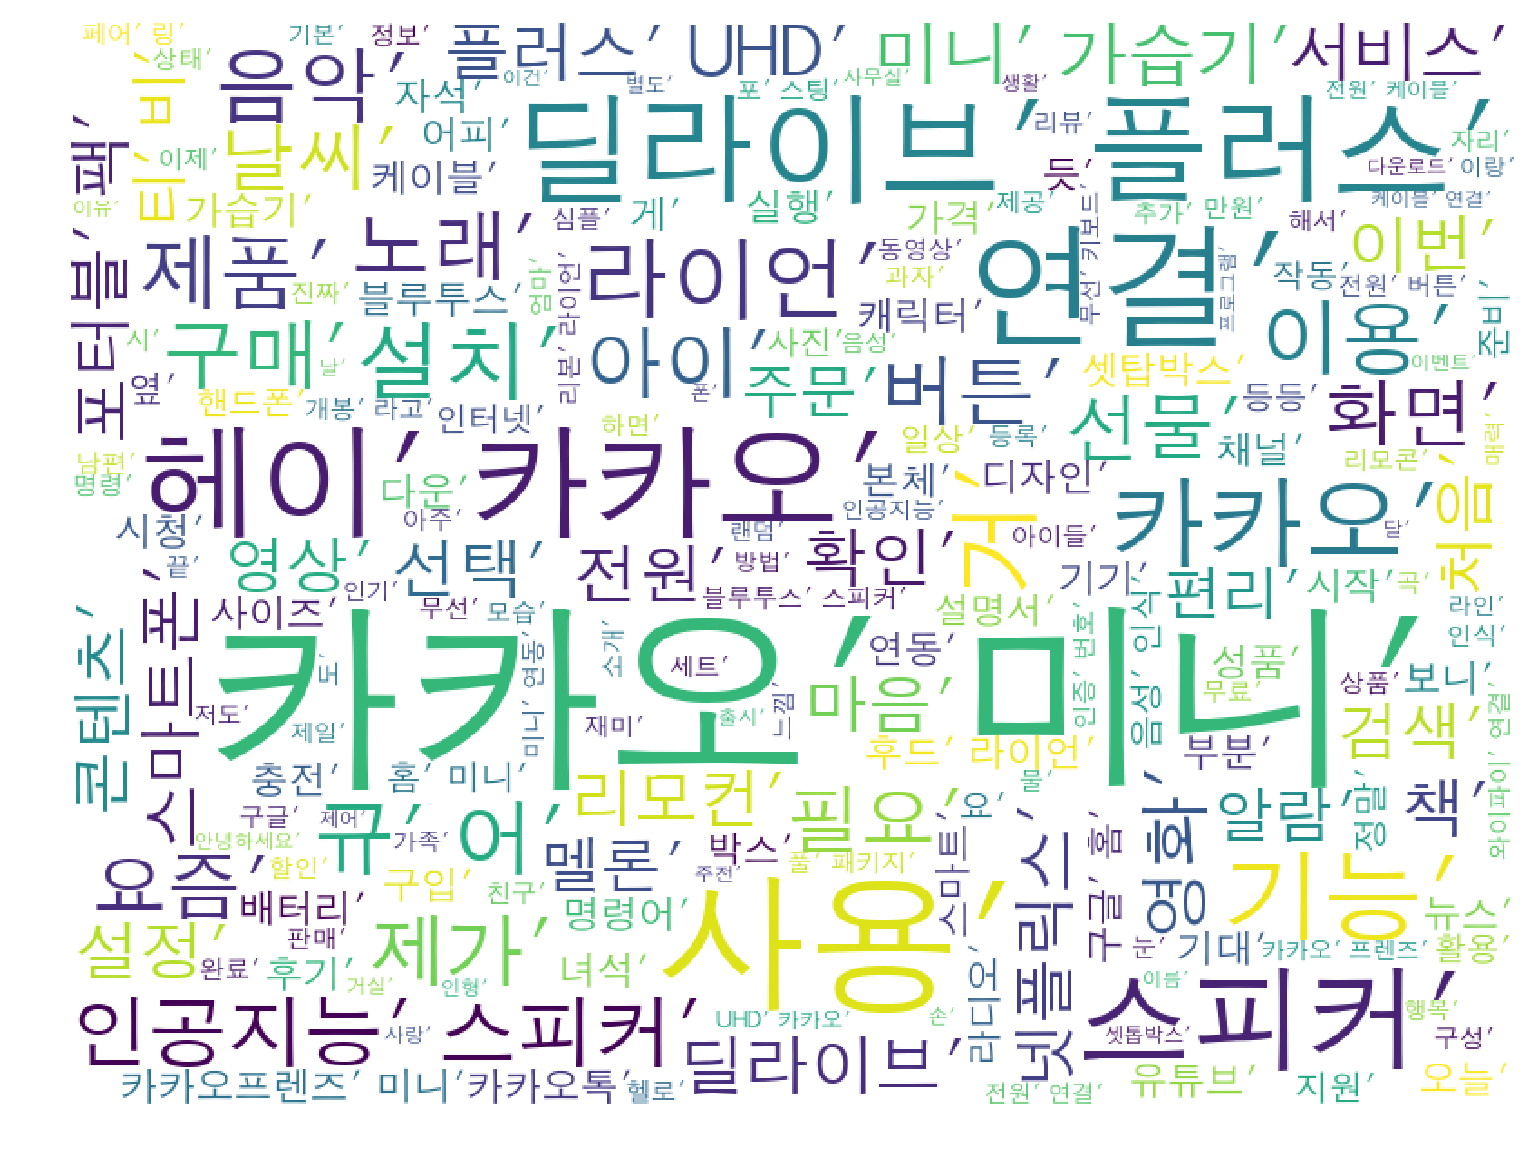

CPU times: user 1.63 s, sys: 389 ms, total: 2.02 s
Wall time: 2.05 s


In [26]:
%time displayWordCloud(str(result))
#나눔고딕 폰트 설치에 문제가 있음

In [20]:
pipeline = ptm.Pipeline(ptm.splitter.NLTK(),
                        ptm.tokenizer.Komoran(),
                        ptm.helper.POSFilter('NN*'),
                        ptm.helper.SelectWordOnly(),
                        ptm.helper.StopwordFilter(file='stopwordsKor.txt'),
                        ptm.counter.WordCounter())
corpus = ptm.CorpusFromFile('kakaomini_content.txt')
result = pipeline.processCorpus(corpus)
print('== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 + 단어 수 ==')
print(result)

== 문장 분리 + 형태소 분석 + 명사만 추출 + 단어만 보여주기 + 단어 수 ==
[[[('카카오', 2), ('미니', 2), ('봉기', 1), ('사용', 1), ('장단점', 1)], [('생활', 1), ('편리', 1), ('카카오', 1), ('미니', 1), ('안녕하세요', 1), ('행복', 1), ('하루', 1)], [('카카오', 1), ('미니', 1)], [('인공지능', 1), ('스피커', 1), ('티', 1), ('비', 1), ('선전', 1), ('남', 1)], [('며칠', 2), ('남편', 2), ('선물', 2), ('카카오', 2), ('미니', 2), ('박스', 2), ('스피커', 2), ('고 온', 1), ('후기', 1), ('포', 1), ('스팅', 1), ('인공지능', 1), ('개량', 1), ('해서', 1), ('제품', 1), ('생일', 1), ('친구', 1), ('카카오톡', 1), ('모양', 1)], [('스피커', 3), ('심플', 2), ('라이언', 2), ('짜', 1), ('잔', 1), ('느낌', 1), ('야외', 1), ('사용', 1), ('포터블', 1), ('밧데리', 1), ('맘', 1), ('구입', 1), ('정말', 1), ('버튼', 1), ('위쪽', 1), ('카카오', 1), ('미니', 1), ('설명서', 1), ('충전기', 1), ('끝', 1), ('규', 1), ('어도', 1), ('캐릭터', 1), ('귀여워', 1), ('요', 1)], [('라이언', 1), ('팔', 1), ('부분', 1), ('자석', 1), ('접착력', 1), ('딸아이', 1), ('손', 1), ('자동', 1)], [('단점', 1), ('페인트', 1)], [('카카오', 3), ('계정', 3), ('사용', 2), ('아이', 2), ('미니', 2), ('부분', 2), ('카카오톡', 2), ('연결', 2), ('다운', 2),

In [21]:
term_counts = {}
for doc in result:
    for sent in doc:
        for _str in sent:
            term_counts[_str[0]] = term_counts.get(_str[0], 0) + int(_str[1])

In [22]:
word_freq = []
for key, value in term_counts.items():
    word_freq.append((value,key))

word_freq.sort(reverse=True)
print(word_freq)

[(728, '카카오'), (547, '미니'), (257, '연결'), (227, '사용'), (205, '스피커'), (184, '딜라이브'), (160, '헤이'), (153, '플러스'), (132, '라이언'), (101, '기능'), (87, '전원'), (86, '거'), (84, '가습기'), (79, '규'), (77, '설치'), (75, '버튼'), (72, '음악'), (70, '어'), (68, '멜론'), (67, '인공지능'), (61, '제품'), (61, '이용'), (58, '선물'), (56, '콘텐츠'), (56, '!!'), (55, '아이'), (54, '연동'), (53, '제가'), (52, '영화'), (52, '블루투스'), (51, '케이블'), (51, '날씨'), (51, '구매'), (50, '노래'), (50, '!!!'), (48, '카카오프렌즈'), (48, '책'), (47, '구글'), (46, '화면'), (46, '선택'), (45, '요즘'), (44, '필요'), (44, '설정'), (41, '포터블'), (41, '티'), (40, '팩'), (40, '주문'), (40, '서비스'), (40, '비'), (39, '스마트폰'), (39, '리모컨'), (39, 'UHD'), (38, '음성'), (37, '확인'), (37, '셋탑박스'), (37, '넷플릭스'), (36, '홈'), (36, '무료'), (35, '이번'), (35, '영상'), (35, '마음'), (34, '인식'), (33, '처음'), (33, '검색'), (33, '가격'), (32, '프렌즈'), (32, '알람'), (31, '후드'), (31, '편리'), (30, '무선'), (30, '기기'), (29, '후기'), (29, '동영상'), (29, '게'), (28, '인터넷'), (28, '본체'), (28, '구입'), (27, '캐릭터'), (27, '스마트'), (27, '끝'), (26, '

In [23]:
df_result = pd.DataFrame(word_freq, columns = ['단어','빈도'])

In [28]:
df_result.head(50)

,단어,빈도
0,728,카카오
1,547,미니
2,257,연결
3,227,사용
4,205,스피커
5,184,딜라이브
6,160,헤이
7,153,플러스
8,132,라이언
9,101,기능


In [ ]:
#" ".join() 시, 한글자 씩 인식되는 거
#작음따옴표가 wordcloud에 나타나는 문제